Implementing [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) with numpy.

## K-nearest neighbor classifier

You are implementing one of the simplest machine learning algorithms, a K-Nearest Neighbor Classifier.
We will apply it to tasks:
- binary classification (that is, only two classes)
- multi-class classification (that is, multiple classes)

Since the method needs a hyperparameter - the number of neighbors, we will select it based on cross-validation.

Before completing the assignment:
- Put the files 'knn.py', 'metrics.py', 'dataset.py', `download_data.sh` into the current directory (/ content /)
- run the file `download_data.sh` to download the data that we will use for training into the data directory (data will appear during the launch of the bash script)

In [ ]:
! bash download_data.sh

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

In [3]:
model = KNN(k = 3, metric = 'euclidean')
print(model.k, model.metric)

3 euclidean


## Load and visualize data

The task has already given the `load_svhn` function, which loads data from disk. It returns data for training and testing as numpy arrays.

We'll use numbers from the Street View House Numbers dataset (SVHN, http://ufldl.stanford.edu/housenumbers/).

In [24]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((1000, 32, 32, 3), (1000,), (100, 32, 32, 3), (100,))

In [12]:
np.bincount(train_y)

array([ 66, 203, 161, 125, 102,  88,  61,  74,  65,  55])

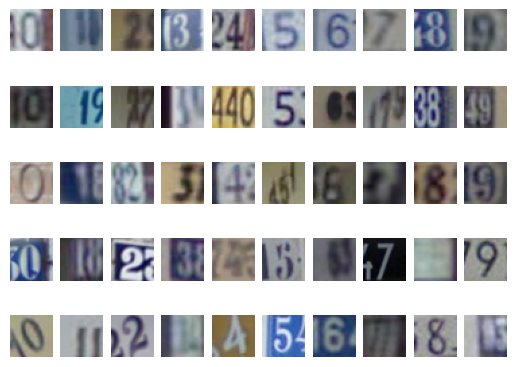

In [11]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

## First we implement KNN for binary classification

As a binary classification task, we will train a model to distinguish the number 0 from the number 9.

In [6]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

binary_train_X.shape, binary_train_y.shape, binary_test_X.shape, binary_test_y.shape

((121, 3072), (121,), (16, 3072), (16,))

In [8]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1, metric='manhattan')
knn_classifier.fit(binary_train_X, binary_train_y)

### It's time to write some code!

Implement the functions `compute_distances_two_loops`,` compute_distances_one_loop` and `compute_distances_no_loops`
in the file `knn.py`.

These functions build an array of distances between all vectors in the test set and in the training set.
As a result, they must build an array of size `(num_test, num_train)`, where the coordinate `[i][j]` corresponds to the distance between the i-th vector in test (`test[i]`) and the j-th vector in train ( `train[j]`).

**Please note** We will use the measures L1 and L2 as a distance.

In [9]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [10]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [11]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [12]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

9.1 ms ± 407 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.97 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.3 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
binary_test_X.shape

(16, 3072)

In [14]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)
prediction.shape

(16,)

In [15]:
# TODO: implement binary_classification_metrics in metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.70


In [16]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 0.75, Precision: 0.75, Recall: 1.00, F1: 0.86


## Cross-validation

Let's try to find the best value for the parameter k for the KNN algorithm!

For this we will use k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). We'll split the training data into 5 folds and in turn use each of them as validation data and the rest as training data.

As a final estimate of the effectiveness of k, we will average the F1 score across all folds.
After that, we'll just pick the k value with the best metric value.

In [17]:
help(np.array_split)

Help on _ArrayFunctionDispatcher in module numpy:

array_split(ary, indices_or_sections, axis=0)
    Split an array into multiple sub-arrays.

    Please refer to the ``split`` documentation.  The only difference
    between these functions is that ``array_split`` allows
    `indices_or_sections` to be an integer that does *not* equally
    divide the axis. For an array of length l that should be split
    into n sections, it returns l % n sub-arrays of size l//n + 1
    and the rest of size l//n.

    See Also
    --------
    split : Split array into multiple sub-arrays of equal size.

    Examples
    --------
    >>> x = np.arange(8.0)
    >>> np.array_split(x, 3)
    [array([0.,  1.,  2.]), array([3.,  4.,  5.]), array([6.,  7.])]

    >>> x = np.arange(9)
    >>> np.array_split(x, 4)
    [array([0, 1, 2]), array([3, 4]), array([5, 6]), array([7, 8])]



In [18]:
num_folds = 5
train_folds_X = np.array_split(binary_train_X[1:], num_folds)
train_folds_y = np.array_split(binary_train_y[1:], num_folds)

In [19]:
binary_train_X[1:].shape

(120, 3072)

In [20]:
train_folds_X[0].shape, train_folds_X[1].shape, train_folds_X[2].shape, train_folds_X[3].shape, train_folds_X[4].shape

((24, 3072), (24, 3072), (24, 3072), (24, 3072), (24, 3072))

In [21]:
train_folds_X = np.array(train_folds_X)
train_folds_y = np.array(train_folds_y)
train_folds_X.shape, train_folds_y.shape

((5, 24, 3072), (5, 24))

In [23]:
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    
    avg_f1 = 0
    
    for fold_id in range(num_folds):
        
        val_X = train_folds_X[fold_id]
        val_y = train_folds_y[fold_id]
        
        new_train_X = np.concatenate((train_folds_X[:fold_id], train_folds_X[fold_id+1:]))
        new_train_y = np.concatenate((train_folds_y[:fold_id], train_folds_y[fold_id+1:]))
        
        new_train_X = new_train_X.reshape(new_train_X.shape[0] * train_X.shape[1], -1)
        new_train_y = new_train_y.reshape(new_train_y.shape[0] * train_y.shape[1],)
        
        model = KNN(k = k, metric = 'euclidean')
        model.fit(train_X, train_y)

        pred = model.predict(val_X)    
        
        precision, recall, f1, accuracy = binary_classification_metrics(pred, val_y)
        
        avg_f1 += f1 
    
    k_to_f1[k] = avg_f1 / num_folds

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 0.720491
k = 2, f1 = 0.509478
k = 3, f1 = 0.639324
k = 5, f1 = 0.607622
k = 8, f1 = 0.627300
k = 10, f1 = 0.598786
k = 15, f1 = 0.646232
k = 20, f1 = 0.654917
k = 25, f1 = 0.638422
k = 50, f1 = 0.590515


### Check how well the best k value works on test data

In [52]:
# TODO Set the best k to the best value found by cross-validation
best_k = 1

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 1
Accuracy: 0.75, Precision: 0.75, Recall: 1.00, F1: 0.86


## multi-class classification

We pass to the next stage - classification for each digit.

In [25]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)
train_X.shape, test_X.shape

((1000, 3072), (100, 3072))

In [26]:
# TODO: Implement predict_labels_multiclass
knn_classifier = KNN(k=1, metric='manhattan')
knn_classifier.fit(train_X, train_y)
predict = knn_classifier.predict(test_X)
predict.shape

(100,)

In [27]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21


Cross-validation again. Now our main metric is accuracy, and we will also average it over all folds.

In [29]:
num_folds = 5
train_folds_X = np.array_split(train_X, num_folds)
train_folds_y = np.array_split(train_y, num_folds)

train_folds_X = np.array(train_folds_X)
train_folds_y = np.array(train_folds_y)
train_folds_X.shape, train_folds_y.shape

((5, 200, 3072), (5, 200))

In [31]:
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_acc = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    
    avg_acc = 0
    
    for fold_id in range(num_folds):
        
        val_X = train_folds_X[fold_id]
        val_y = train_folds_y[fold_id]
        
        train_X = np.concatenate((train_folds_X[:fold_id], train_folds_X[fold_id+1:]))
        train_y = np.concatenate((train_folds_y[:fold_id], train_folds_y[fold_id+1:]))
        
        train_X = train_X.reshape(train_X.shape[0] * train_X.shape[1], -1)
        train_y = train_y.reshape(train_y.shape[0] * train_y.shape[1],)
        
        model = KNN(k = k, metric = 'euclidean')
        model.fit(train_X, train_y)

        pred = model.predict(val_X)    
        
        accuracy = multiclass_accuracy(pred, val_y)
        
        avg_acc += accuracy
    
    k_to_acc[k] = avg_acc / num_folds

for k in sorted(k_to_acc):
    print('k = %d, accuracy = %f' % (k, k_to_acc[k]))

k = 1, accuracy = 0.239000
k = 2, accuracy = 0.250000
k = 3, accuracy = 0.258000
k = 5, accuracy = 0.246000
k = 8, accuracy = 0.231000
k = 10, accuracy = 0.237000
k = 15, accuracy = 0.238000
k = 20, accuracy = 0.222000
k = 25, accuracy = 0.227000
k = 50, accuracy = 0.212000


### Final test - classification into 10 classes on the test sample (test data)

If implemented correctly, you should see an accuracy of at least **0.2**.

In [32]:
# TODO Set the best k as a best from computed
best_k = 3

best_knn_classifier = KNN(k=best_k, metric='euclidean')
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.24


# Part 2. Sklearn 

Let's see how to use Sklearn.

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Just using the model

In [74]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(train_X, train_y)
prediction = knn.predict(test_X)
accuracy = accuracy_score(prediction, test_y)
print("accuracy: %4.2f" % accuracy)

accuracy: 0.24


### Doing cross-validation

In [75]:
scores = cross_val_score(knn, train_X, train_y, cv=5, scoring='accuracy')  # X and y are your data and target variables

print("Scores for all folds:", scores)
print("Average Accuracy:", scores.mean())

Scores for all folds: [0.3     0.24375 0.2625  0.25625 0.25   ]
Average Accuracy: 0.2625


### Finding the best hyperparameters

In order to automatically find the best hyperparameters, we can use `GridSearchCV`. It explores all the combinations of hyperparameters listed in a grid:

- The grid is a dictionary where the **keys** correspond to the name of the hyperparameter to tune, and the **value** correspond to the list of values to consider. The *name* should match the API of the model you're using.

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    'n_neighbors': [3, 5],
    'metric': ['euclidean', 'manhattan'],
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best Score: 0.27125


### Preprocessing the data (well, the vectors...)

Th vectors are huge, take a look...

In [77]:
print("Norm of a vector: ", np.linalg.norm(train_X[0]))
print("The vector:", train_X[0])

Norm of a vector:  7908.678
The vector: [108. 121. 140. ... 144. 158. 171.]


This becomes a problem, and it's one of the issues of the "curse of dimensionality".
A fix for the length of the values is to scale or normalize the vectors. We can:


- Scale the features:
    - make the mean 0 and the standard deviation 1, on each feature, (`StandardScaler`) or
    - make the values to be in `[0, 1]` (`MinMaxScaling`)
- Normalize them: make the vectors have unit norm. (`Normalizer`)

The three options are available at `sklearn.preprocessing`

It's probably a bad idea to mix them up, as one could render useless the effects of the other.

Usually, it's a good idea to experiment with these preprocessing steps and choose the ones that better fit to the models and data you have.

#### Pipeline

To use any preprocessing step(s) in a pipeline along with the model, we can use `Pipeline` from `sklearn.pipeline`.

That way, the preprocessing steps will be always done in all the steps of cross-validation.

In [78]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=3, metric = 'euclidean'))
])

scores = cross_val_score(pipeline, train_X, train_y, cv=5, scoring='accuracy')

print("Average Accuracy:", scores.mean())

Average Accuracy: 0.27625


### Combining things

In order to try the hyperparameters for different steps on the pipeline, we need to add a prefix to the name of the hyperparameter with the name of the step on the grid.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('scaler', None),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), Normalizer()], # trying different scalers/normalizers
    'classifier__n_neighbors': [1, 3, 5], # trying different values for k
    'classifier__metric': ['euclidean', 'manhattan'] # trying different metrics for the distance
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_X, train_y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Model:", best_model)

Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'scaler': Normalizer()}
Best Score: 0.32499999999999996
Model: Pipeline(steps=[('scaler', Normalizer()),
                ('classifier', KNeighborsClassifier(metric='manhattan'))])


We see a huge improvement to 32% accuracy, perhaps the Normalizer (making the vectors unit length) was what caused the improvement. MORE ON THAT LATER.